In [84]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [74]:
image_path = "konak.jpg"

In [75]:
img = Image.open(image_path).convert("L")
img = np.array(img)
print(img.shape)

(416, 625)


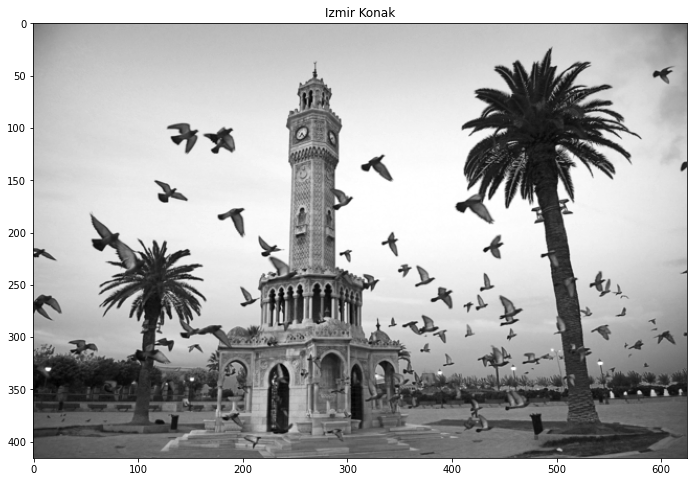

In [76]:
plt.figure(figsize=(12, 8))
plt.title("Izmir Konak")
plt.imshow(img, cmap="gray")
plt.show()

In [77]:
filter_0 = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

In [78]:
def apply_filter(img, filter):
    img_height, img_width = img.shape
    print(f"Image height: {img_height}, width: {img_width}")

    filter_height, filter_width = filter.shape
    print(f"Filter height: {filter_height}, width: {filter_width}")

    num_horizontal_movements = img_width - filter_width + 1
    num_vertical_movements = img_height - filter_height + 1
    
    filtered_img = np.zeros((num_vertical_movements, num_horizontal_movements))
    
    for i in range(num_vertical_movements):
        for j in range(num_horizontal_movements):
            img_subset = img[i: i+filter_height, j: j+filter_width]
            summation = np.sum(img_subset * filter)
            filtered_img[i, j] = summation
    
    return filtered_img

In [79]:
filtered_img_0 = apply_filter(img, filter_0)

Image height: 416, width: 625
Filter height: 3, width: 3


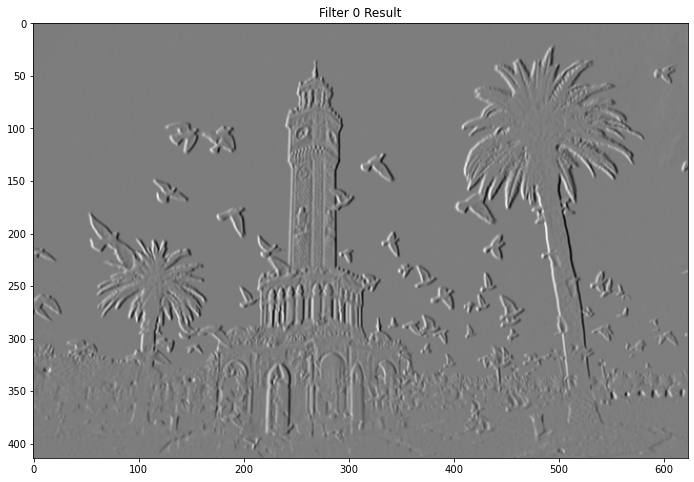

In [80]:
plt.figure(figsize=(12, 8))
plt.title("Filter 0 Result")
plt.imshow(filtered_img_0, cmap="gray")
plt.show()

Image height: 416, width: 625
Filter height: 3, width: 3


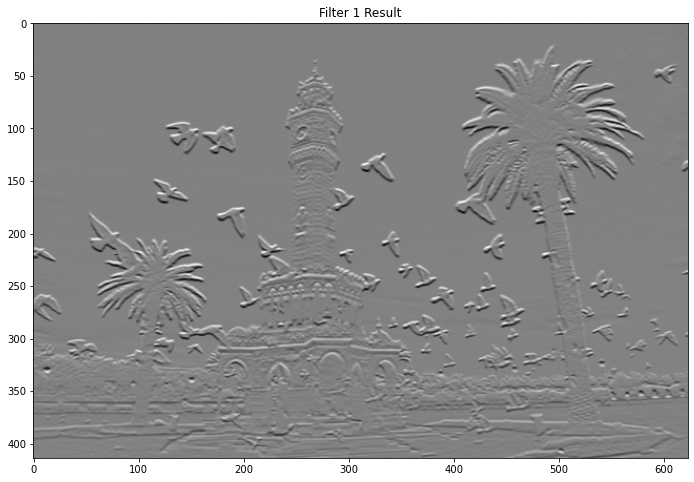

In [81]:
filter_1 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
filtered_img_1 = apply_filter(img, filter_1)
plt.figure(figsize=(12, 8))
plt.title("Filter 1 Result")
plt.imshow(filtered_img_1, cmap="gray")
plt.show()

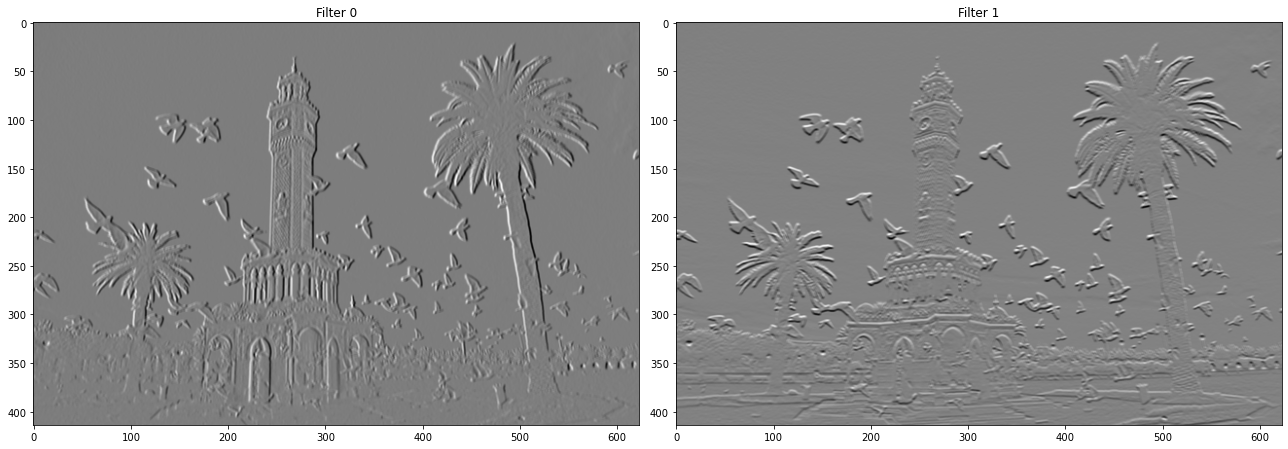

In [82]:
plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.title("Filter 0")
plt.imshow(filtered_img_0, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Filter 1")
plt.imshow(filtered_img_1, cmap="gray")
plt.tight_layout()
plt.show()

Image height: 416, width: 625
Filter height: 3, width: 3
Image height: 416, width: 625
Filter height: 3, width: 3


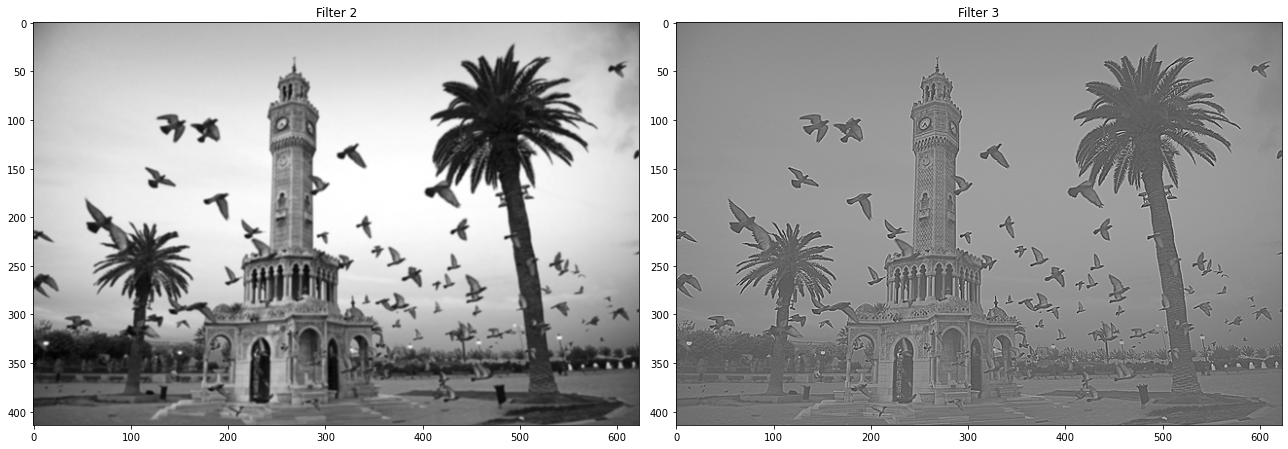

In [83]:
filter_2 = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,   0.25, 0.125],
    [0.0625, 0.125, 0.0625]
])
filtered_img_2 = apply_filter(img, filter_2)

filter_3 = np.array([
    [0, -0.2, 0],
    [-0.2, 1, -0.2],
    [0, -0.2, 0]
])
filtered_img_3 = apply_filter(img, filter_3)

plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.title("Filter 2")
plt.imshow(filtered_img_2, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Filter 3")
plt.imshow(filtered_img_3, cmap="gray")
plt.tight_layout()
plt.show()

### Stride

In [86]:
def convolve_with_stride(img, filter, stride=1):
    img_height, img_width = img.shape
    print(f"Image height: {img_height}, width: {img_width}")

    filter_height, filter_width = filter.shape
    print(f"Filter height: {filter_height}, width: {filter_width}")

    target_img_height = math.floor((img_height - filter_height) / stride) + 1
    target_img_width = math.floor((img_width - filter_width) / stride) + 1
    print(
        f"Target image height: {target_img_height}, width: {target_img_width}")

    filtered_img = np.zeros((target_img_height, target_img_width))

    for i in range(target_img_height):
        for j in range(target_img_width):
            img_subset = img[i*stride: i*stride + filter_height, 
                            j*stride: j*stride+filter_width]
            summation = np.sum(img_subset * filter)
            filtered_img[i, j] = summation
    
    return filtered_img

Image height: 416, width: 625
Filter height: 3, width: 3
Target image height: 414, width: 623
Image height: 416, width: 625
Filter height: 3, width: 3
Target image height: 207, width: 312


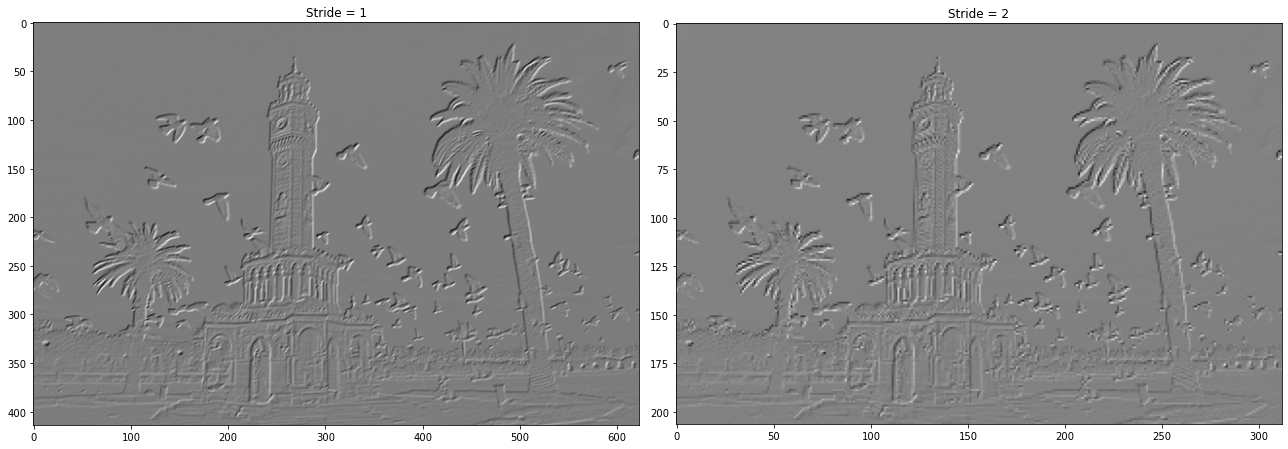

In [92]:
filter_4 = np.array([
    [0, -1, 0],
    [-1, 0, 1],
    [0, 1, 0]
])

filtered_img_4 = convolve_with_stride(img, filter_4, stride=1)
filtered_img_5 = convolve_with_stride(img, filter_4, stride=2)

plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.title("Stride = 1")
plt.imshow(filtered_img_4, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Stride = 2")
plt.imshow(filtered_img_5, cmap="gray")
plt.tight_layout()
plt.show()

### Max Pooling

In [93]:
def max_pool(img, pool_size=4, stride=2):
    img_height, img_width = img.shape
    print(f"Image height: {img_height}, width: {img_width}")

    target_img_height = math.floor((img_height - pool_size) / stride) + 1
    target_img_width = math.floor((img_width - pool_size) / stride) + 1
    print(
        f"Target image height: {target_img_height}, width: {target_img_width}")

    pooled_img = np.zeros((target_img_height, target_img_width))

    for i in range(target_img_height):
        for j in range(target_img_width):
            img_subset = img[i*stride: i*stride + pool_size, j*stride: j*stride+pool_size]
            pooled_img[i, j] = np.max(img_subset)
    
    return pooled_img

Image height: 416, width: 625
Target image height: 104, width: 156


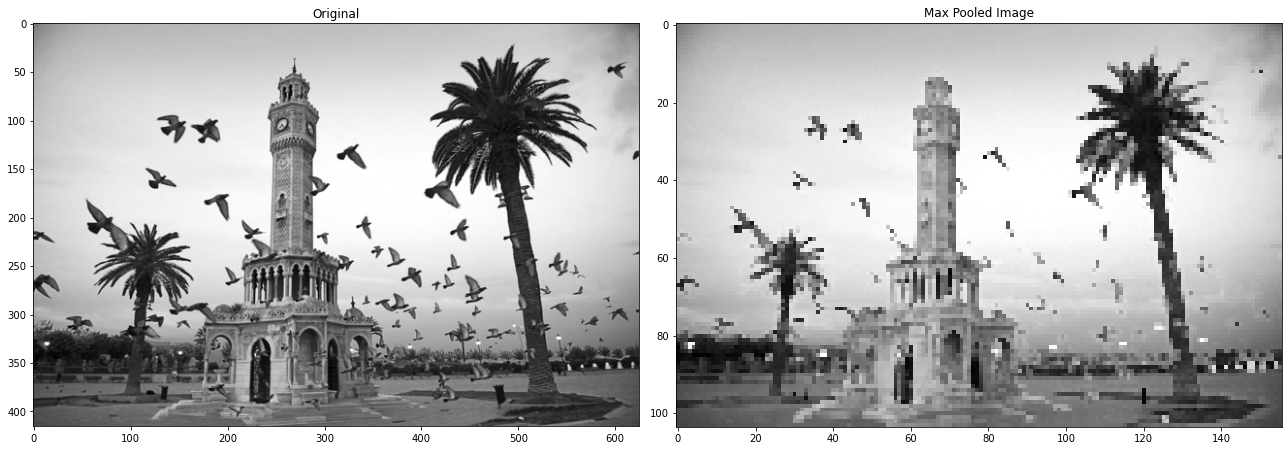

In [94]:
max_pooled_img = max_pool(img, pool_size=4, stride=4)

plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Max Pooled Image")
plt.imshow(max_pooled_img, cmap="gray")
plt.tight_layout()
plt.show()

In [96]:
def avg_pool(img, pool_size=4, stride=2):
    img_height, img_width = img.shape
    print(f"Image height: {img_height}, width: {img_width}")

    target_img_height = math.floor((img_height - pool_size) / stride) + 1
    target_img_width = math.floor((img_width - pool_size) / stride) + 1
    print(
        f"Target image height: {target_img_height}, width: {target_img_width}")

    pooled_img = np.zeros((target_img_height, target_img_width))

    for i in range(target_img_height):
        for j in range(target_img_width):
            img_subset = img[i*stride: i*stride + pool_size, j*stride: j*stride+pool_size]
            pooled_img[i, j] = np.average(img_subset)
    
    return pooled_img

Image height: 416, width: 625
Target image height: 104, width: 156


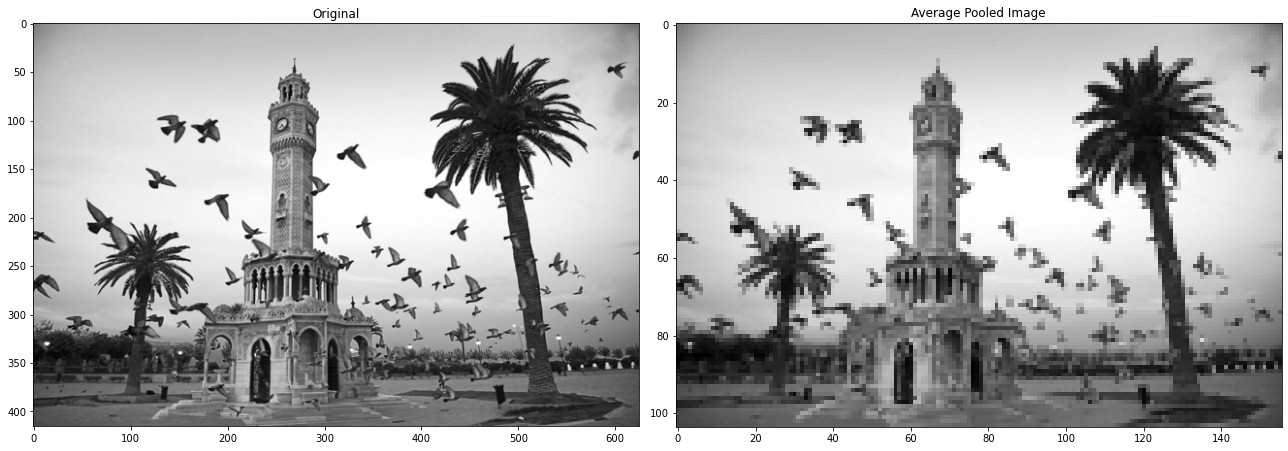

In [97]:
avg_pooled_img = avg_pool(img, pool_size=4, stride=4)

plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Average Pooled Image")
plt.imshow(avg_pooled_img, cmap="gray")
plt.tight_layout()
plt.show()